In [1]:
pip install yt_eda


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import

In [2]:
from yt_eda.preprocessor import DataPreprocessor
from yt_eda.visualization import PreprocessVisualizer, PostprocessVisualizer
from yt_eda.feature_engineering import FeatureEngineer
from yt_eda.model import Model

In [3]:
import pandas as pd
data = pd.read_csv("data/Global YouTube Statistics.csv", encoding='ISO-8859-1')
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# Visualization (before pre-processing)

In [4]:
pre_viz = PreprocessVisualizer(data)

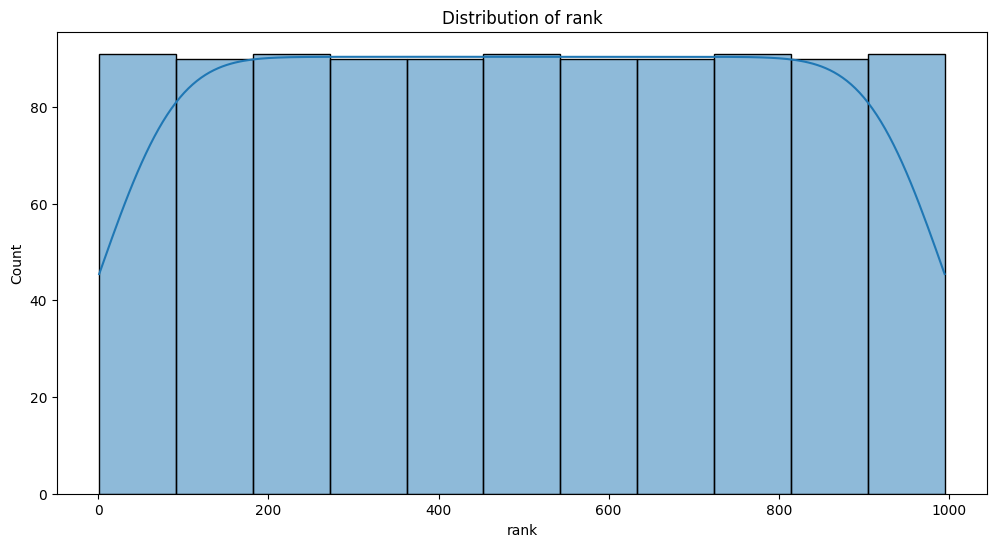

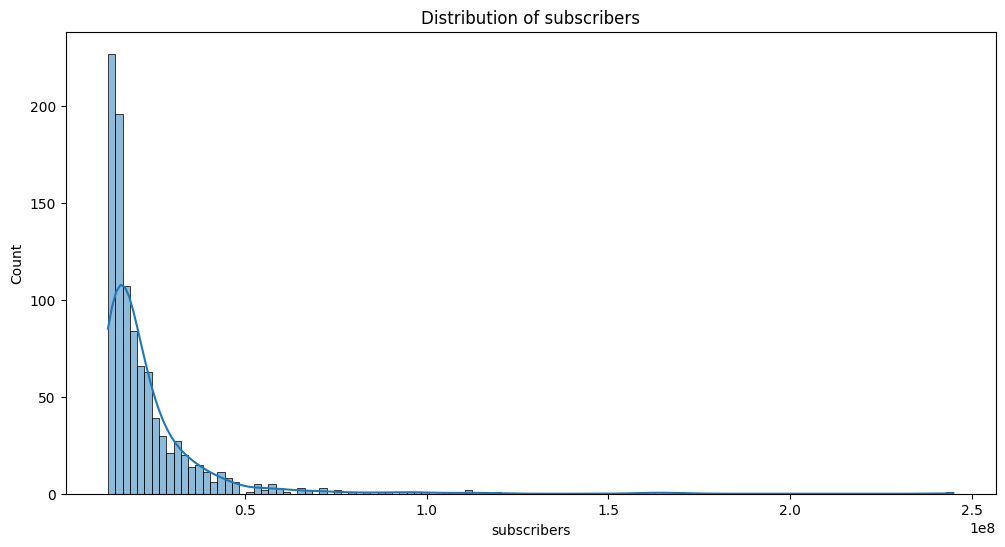

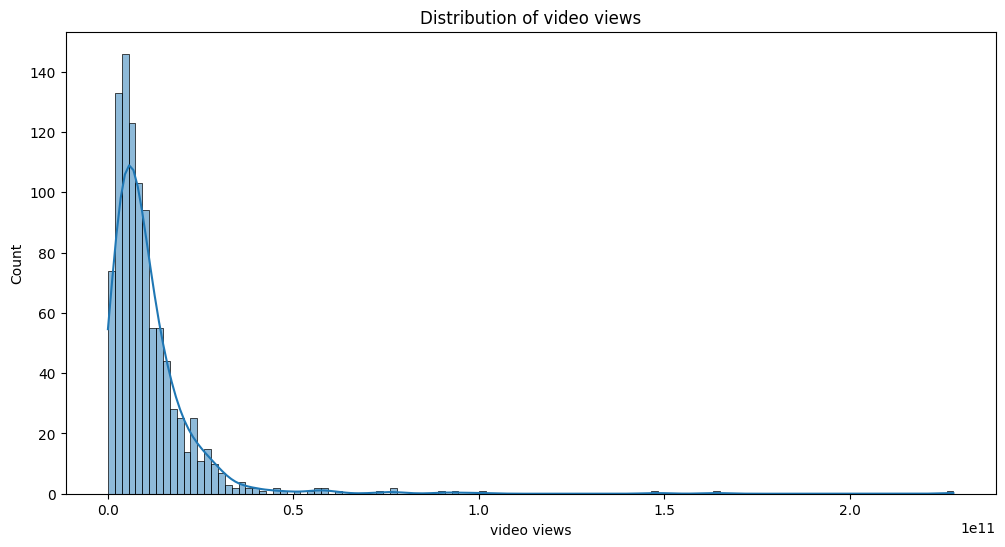

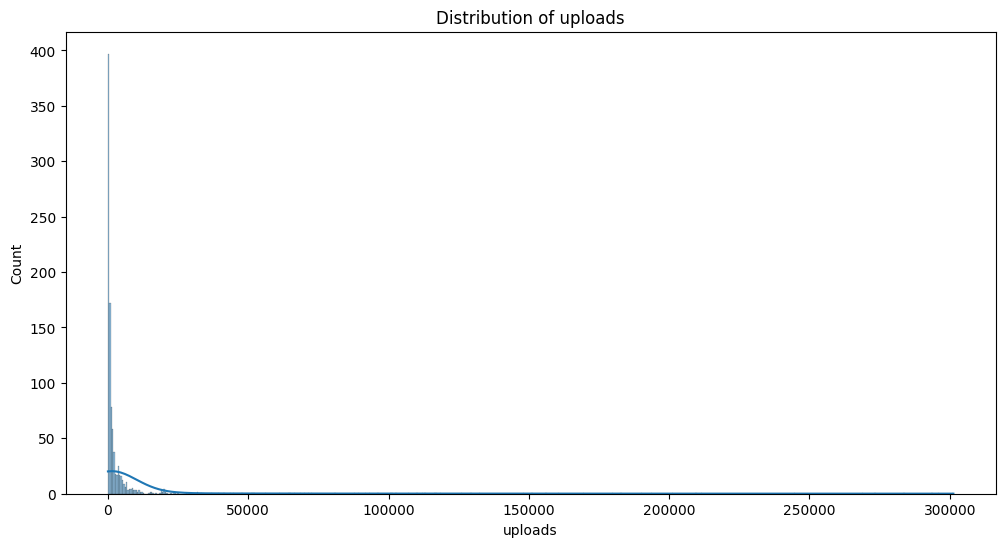

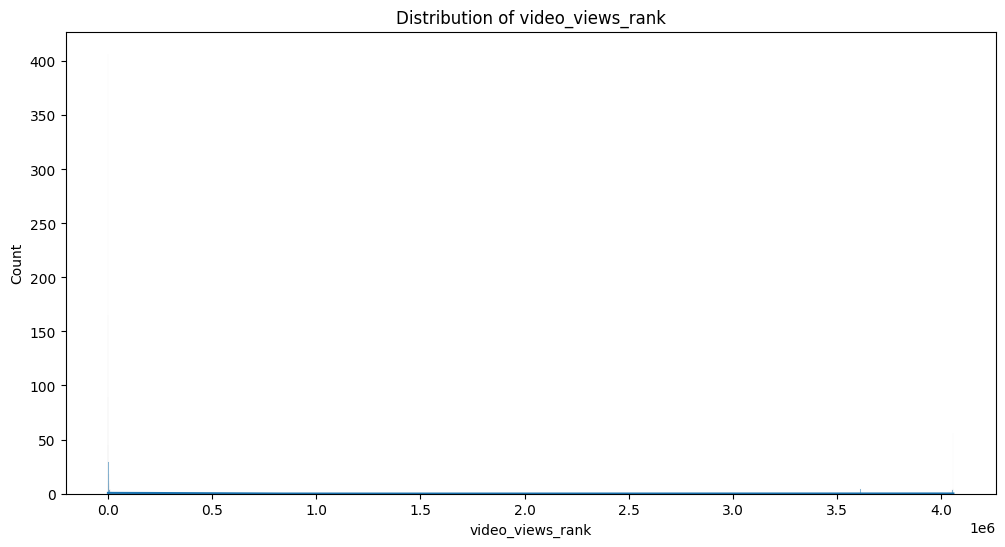

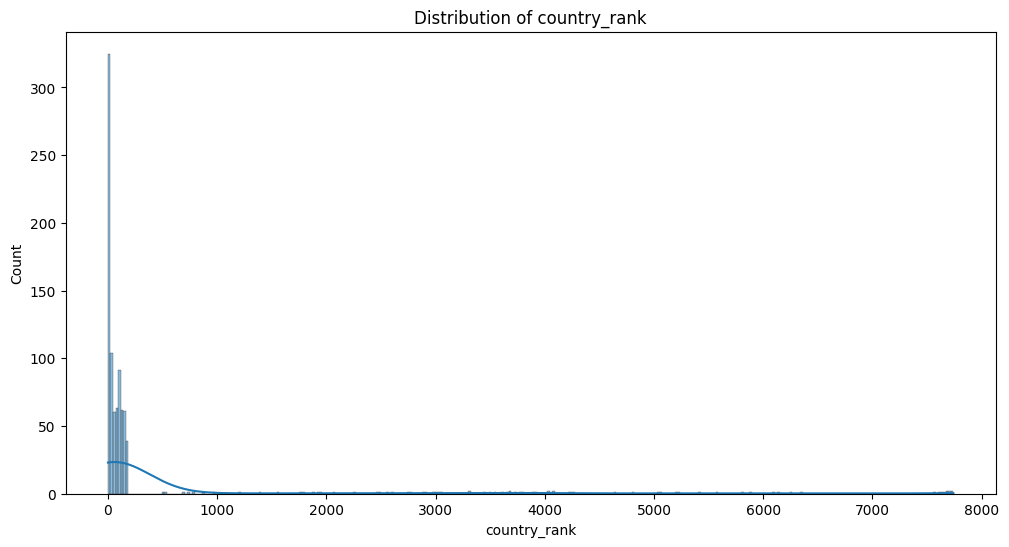

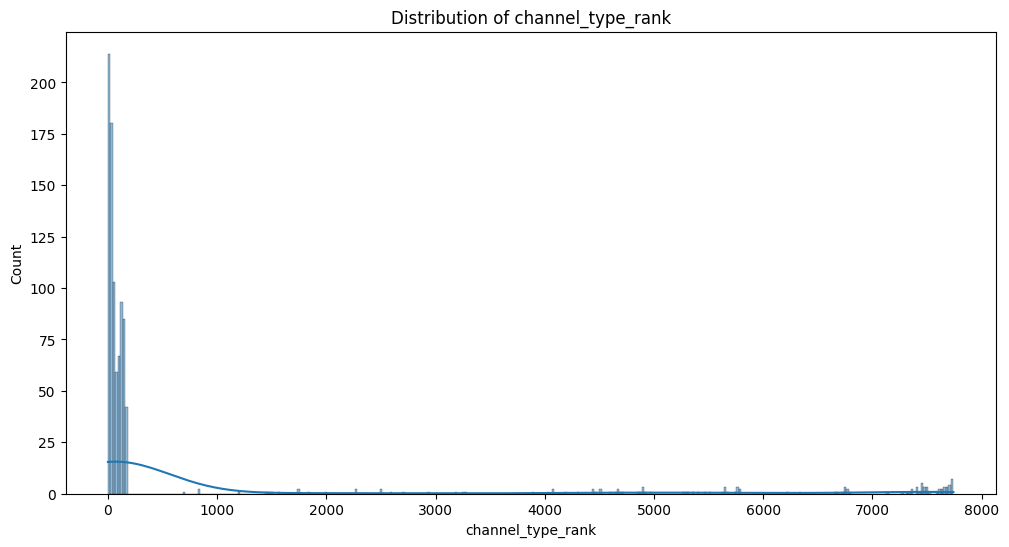

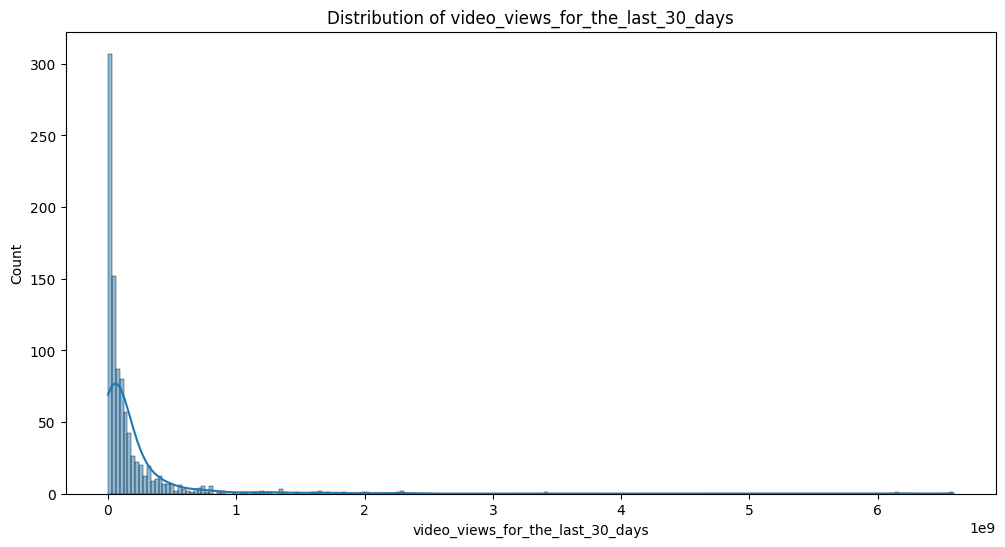

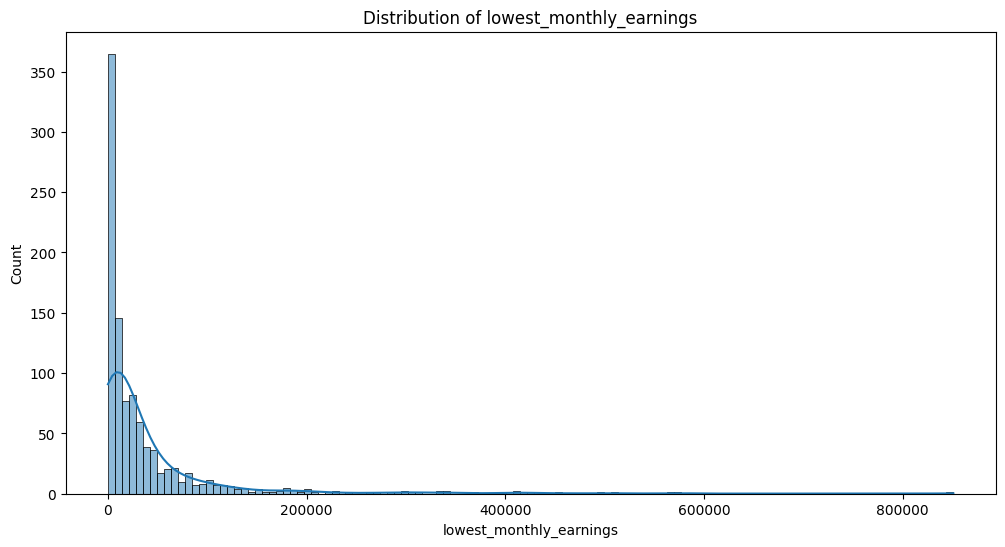

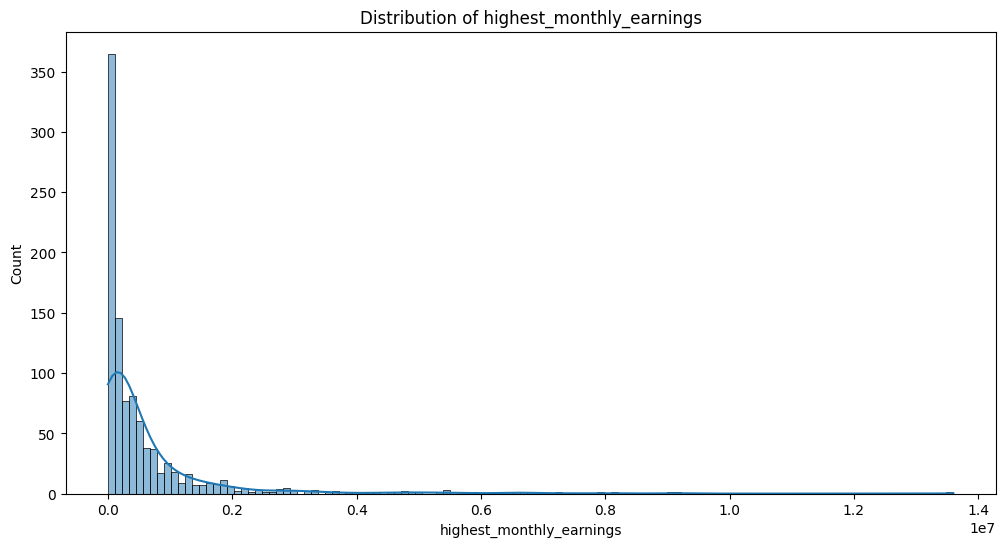

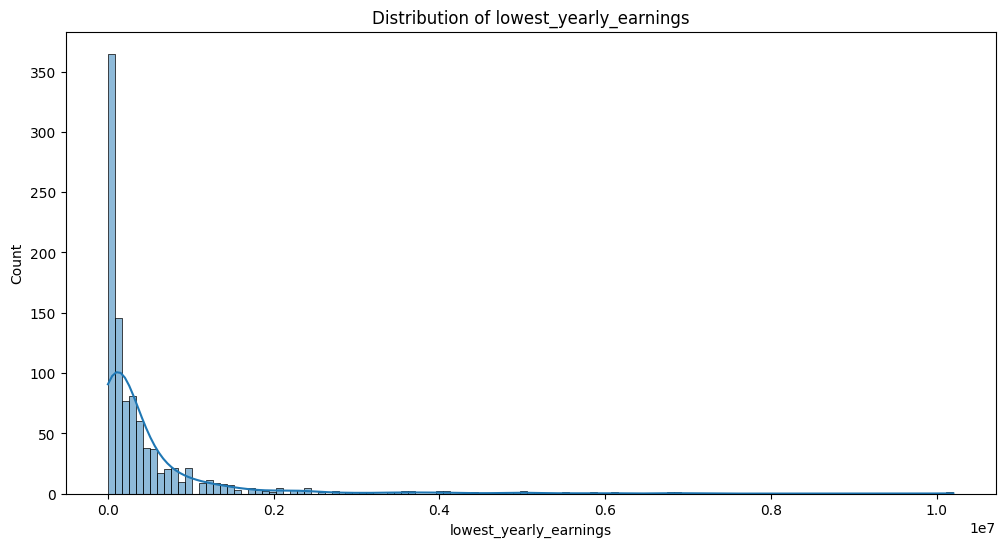

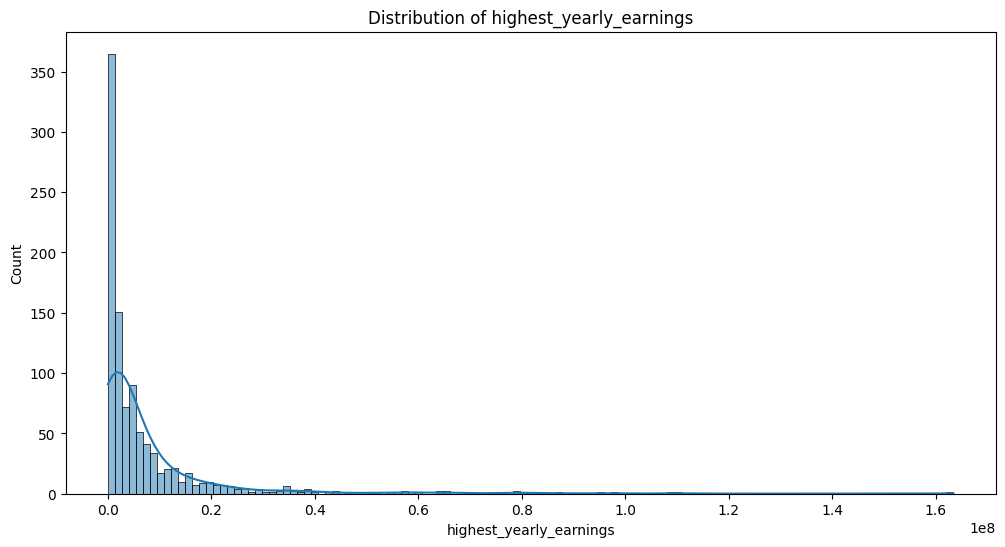

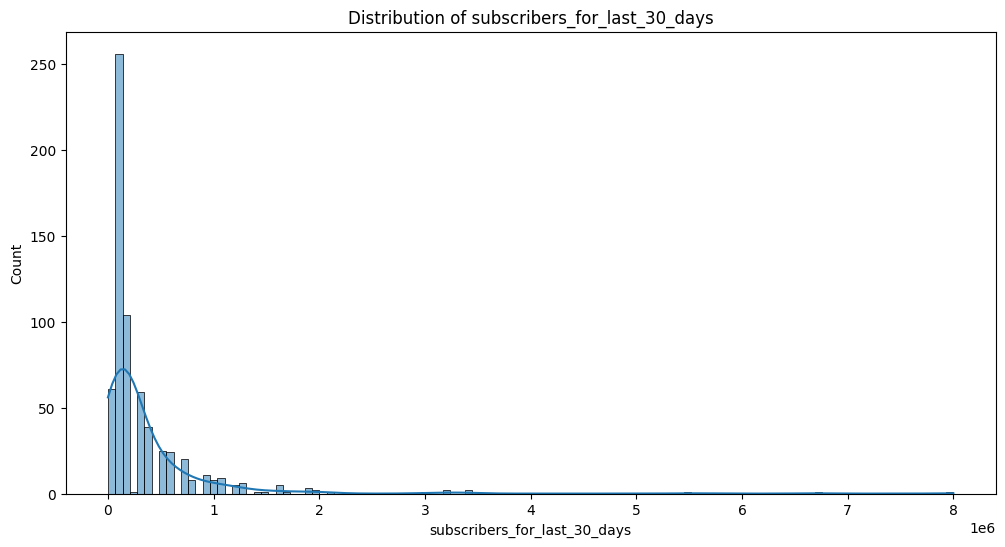

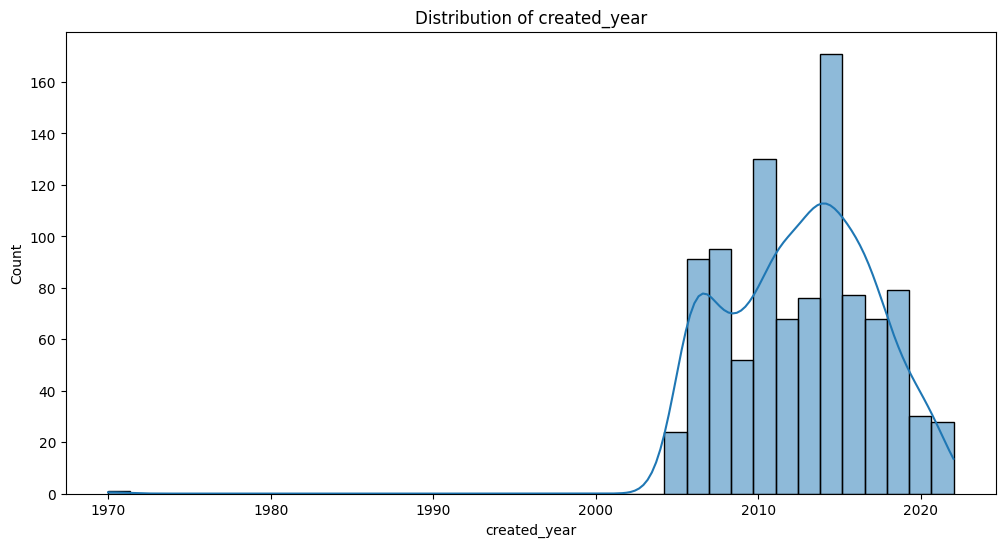

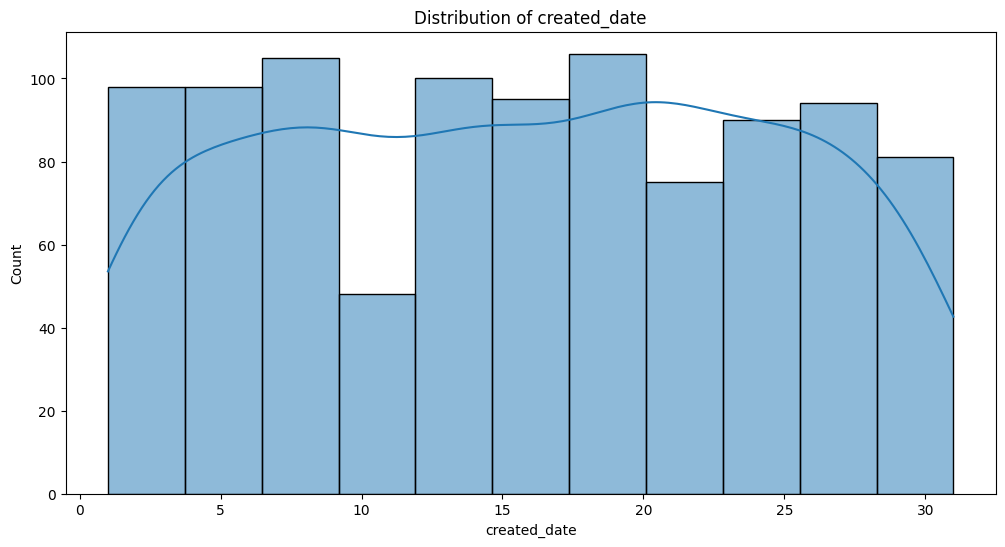

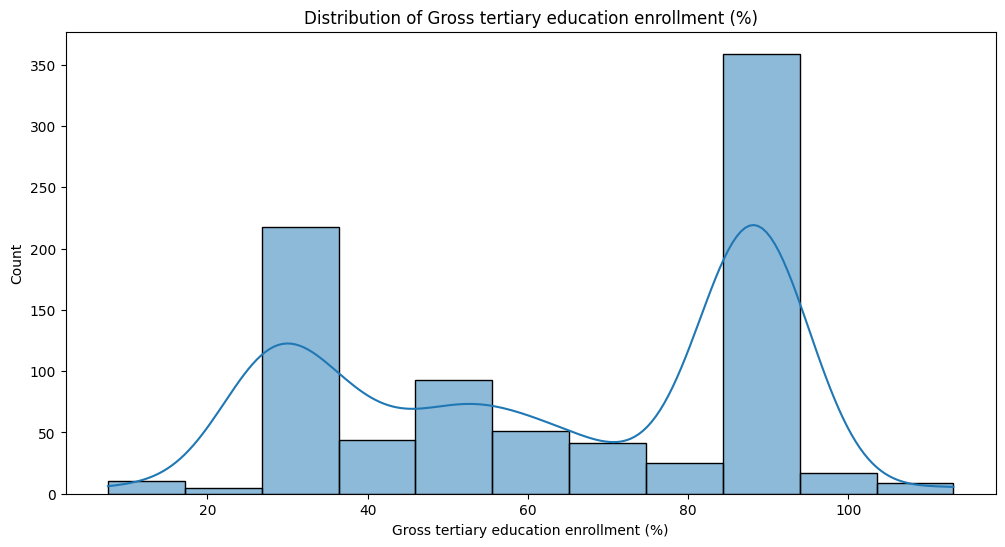

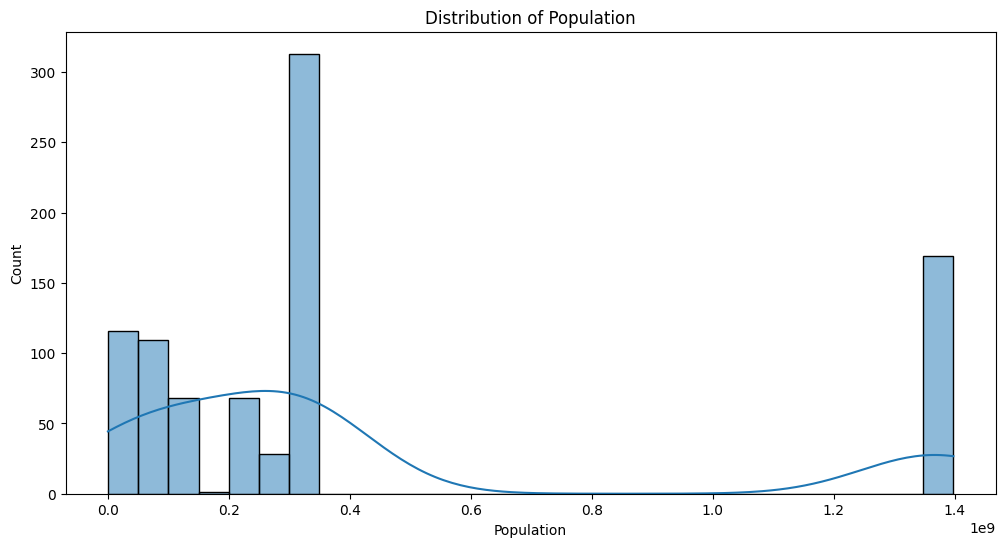

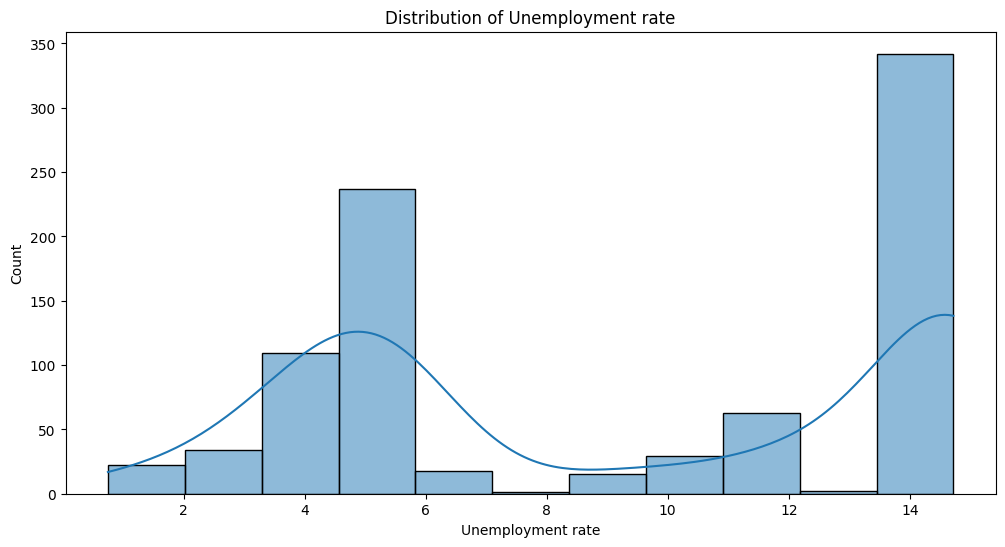

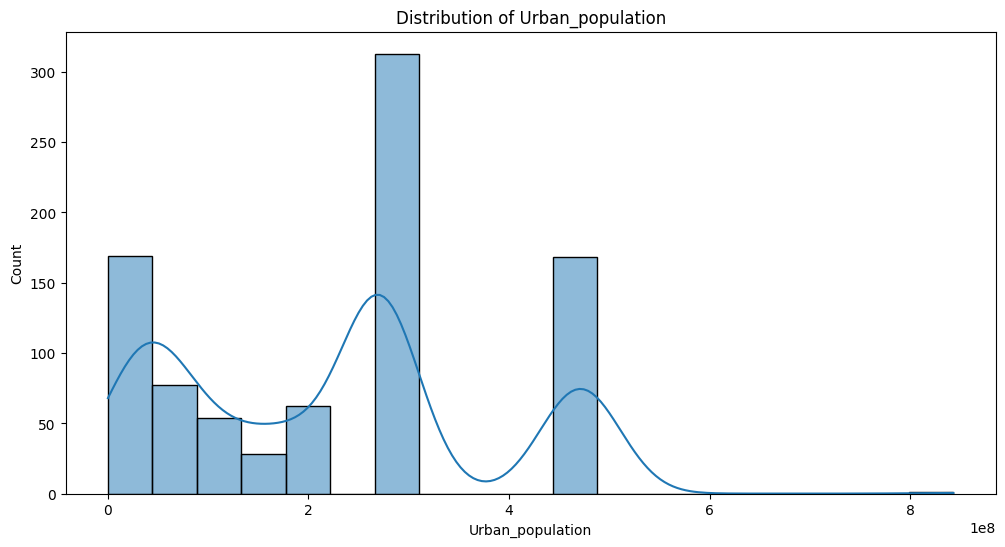

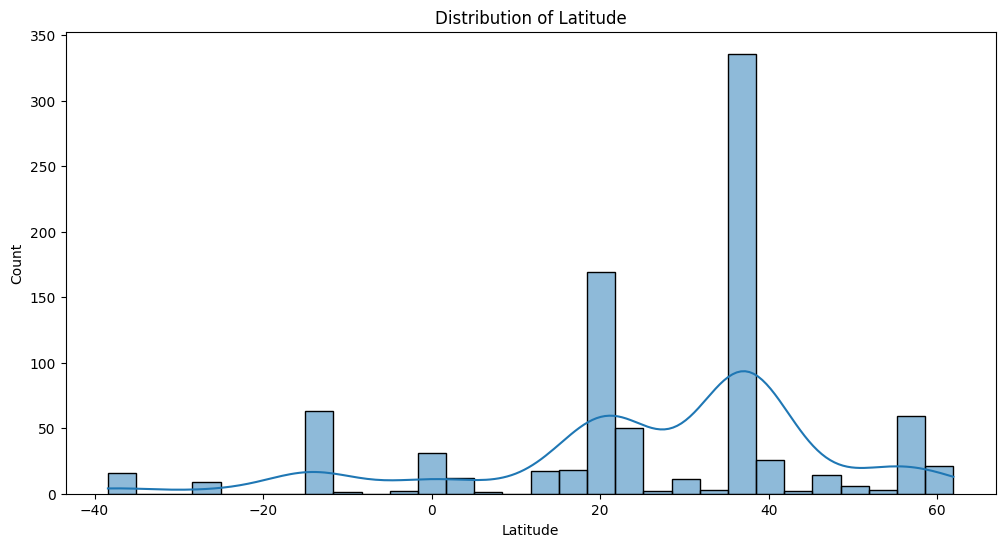

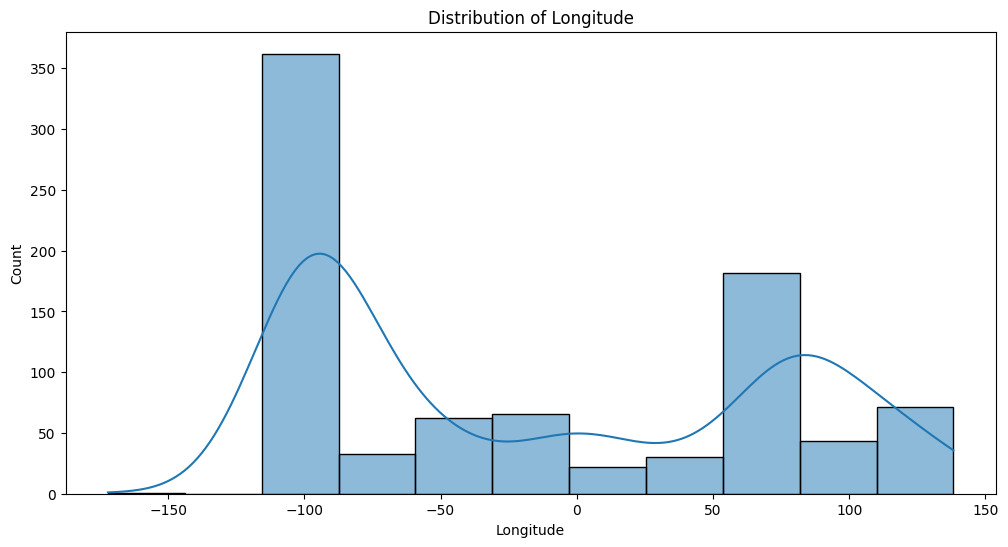

In [5]:
pre_viz.plot_numeric_distribution()

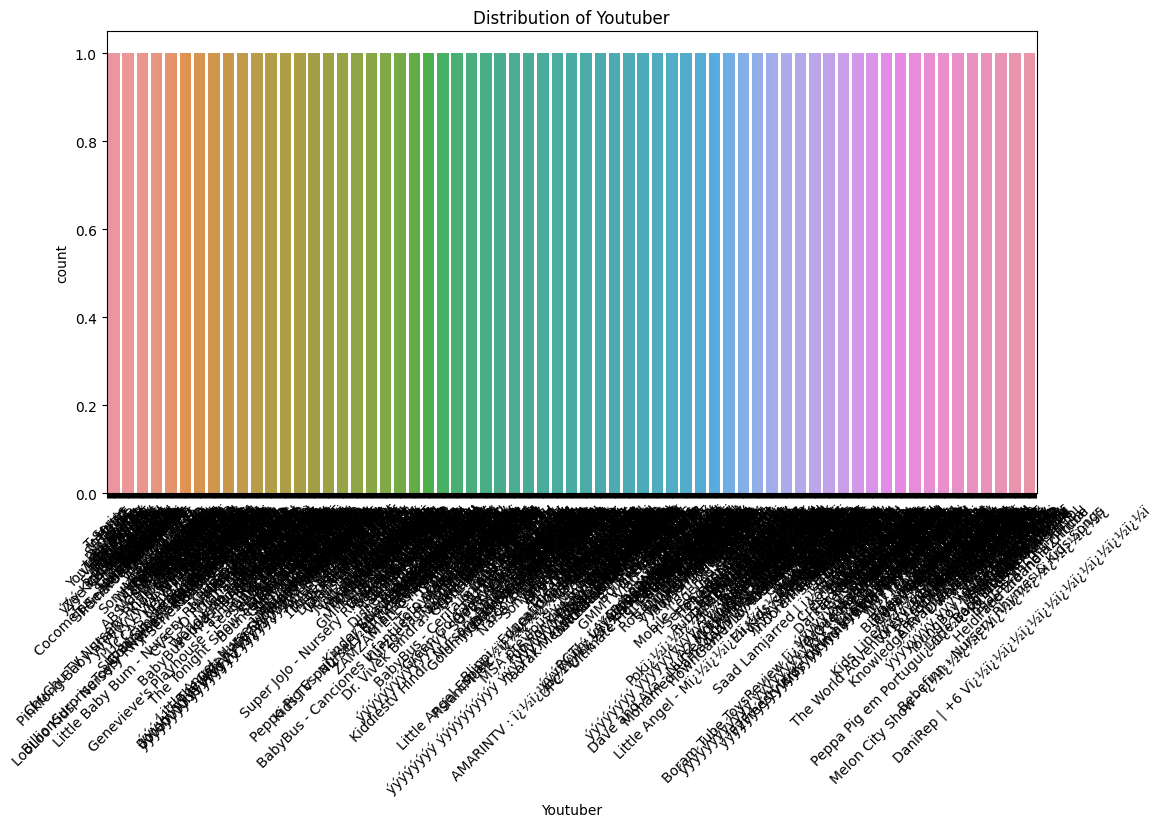

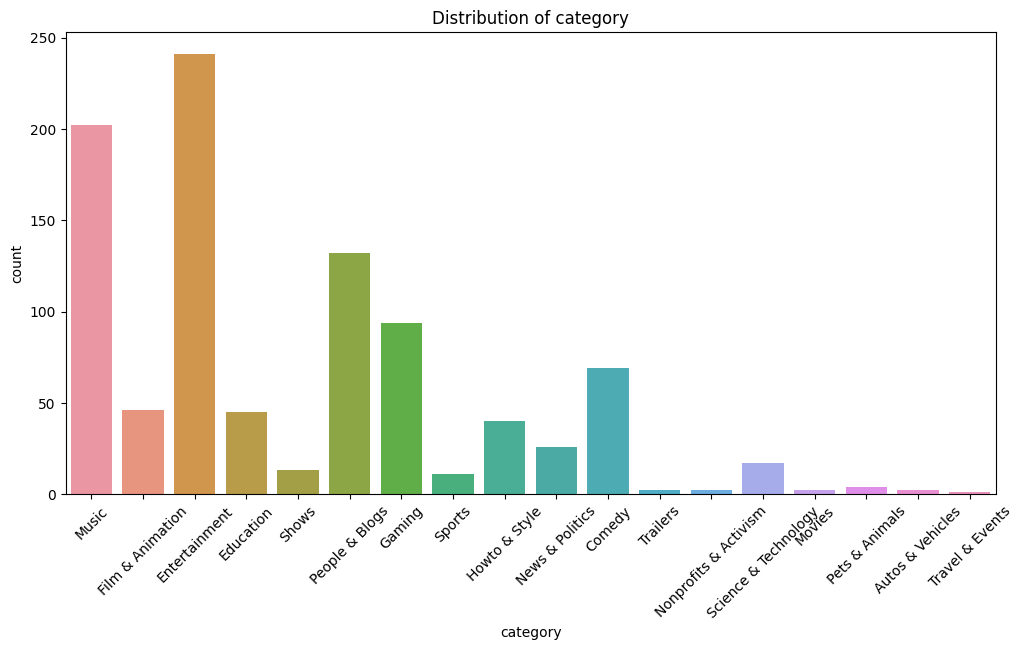

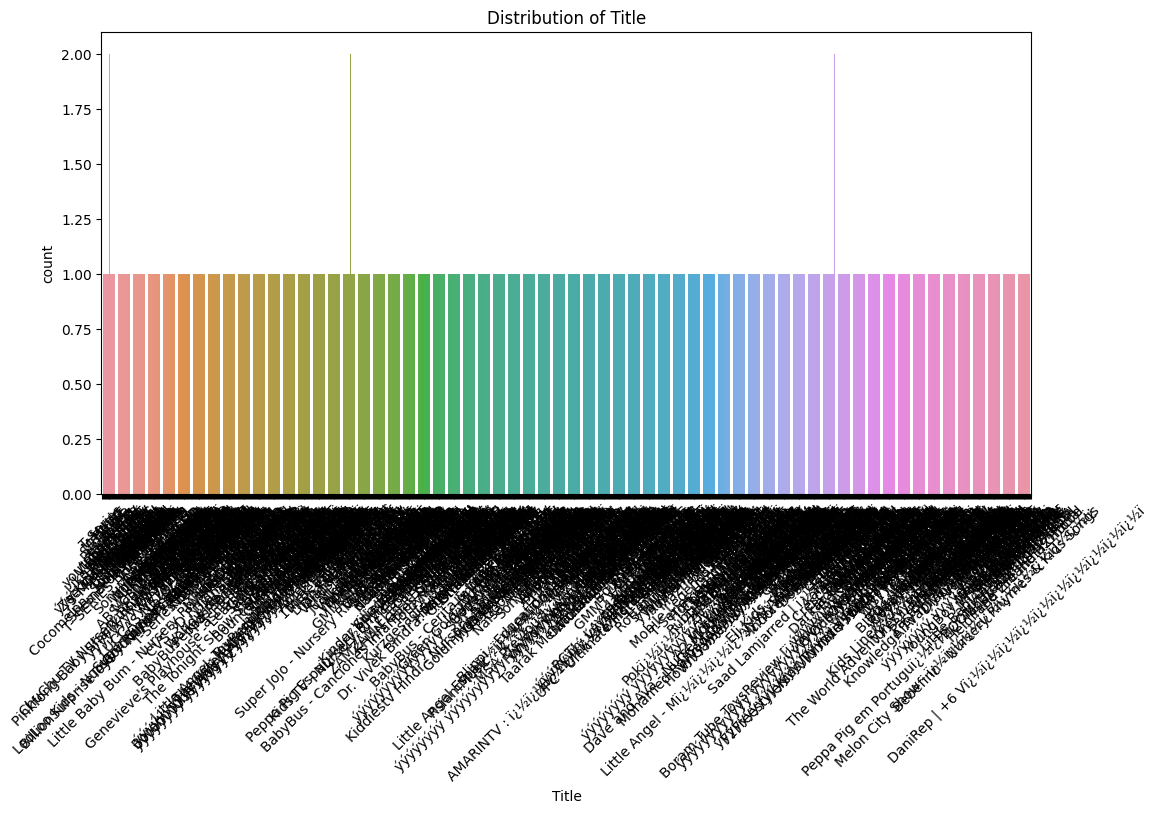

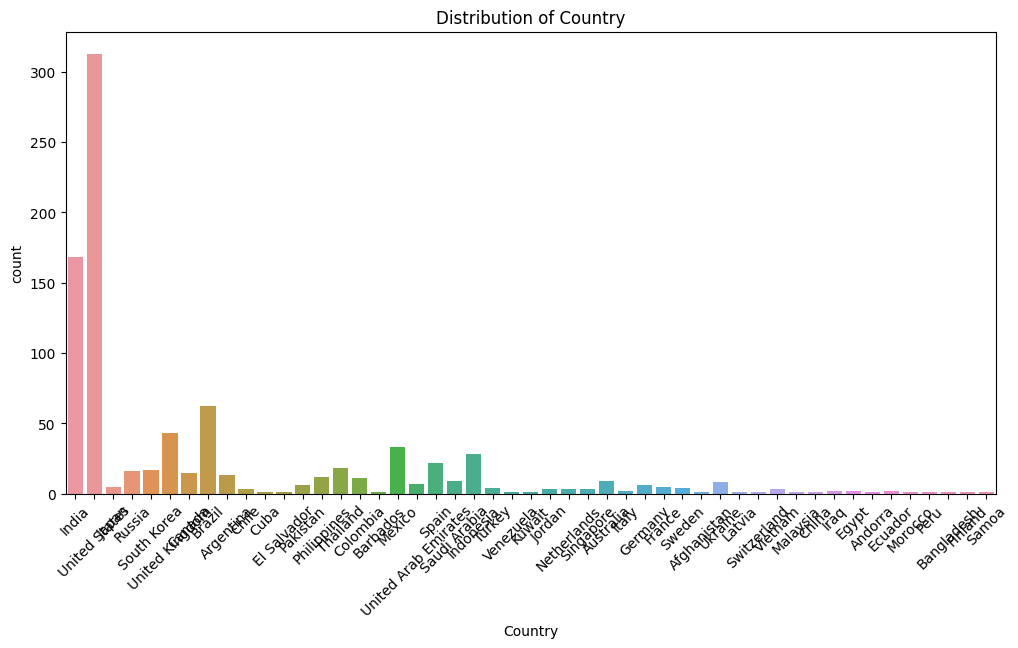

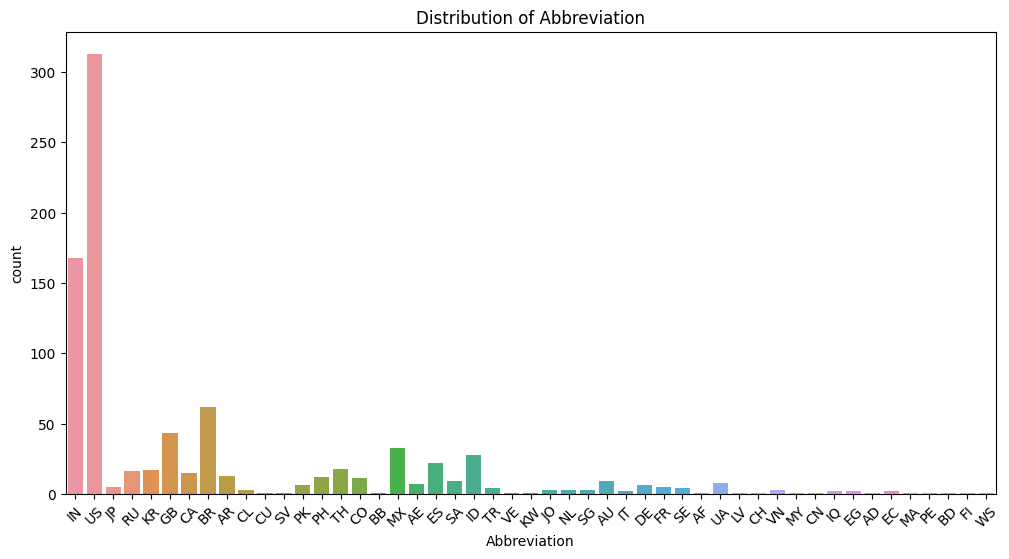

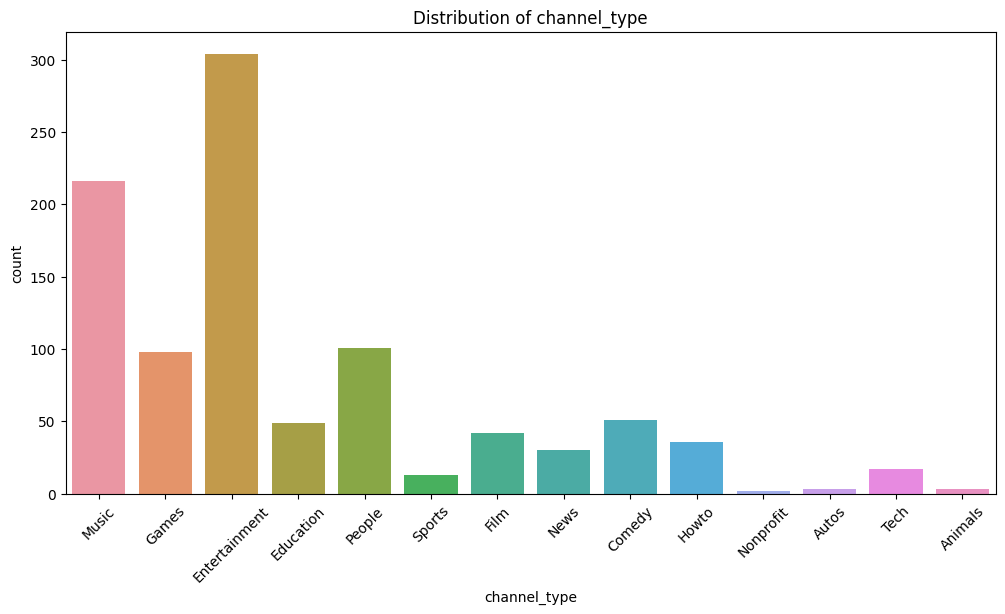

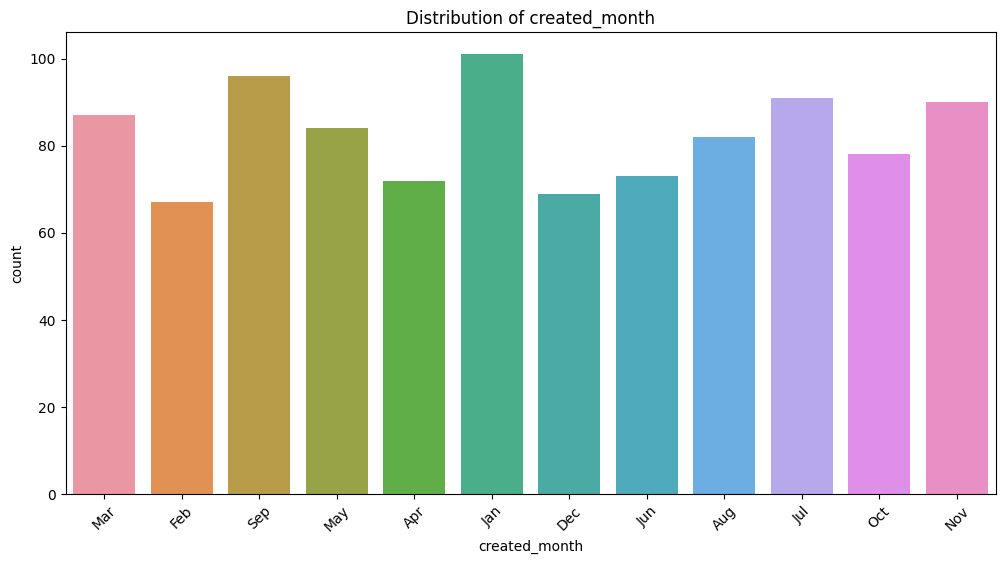

In [6]:
pre_viz.plot_categorical_distribution()

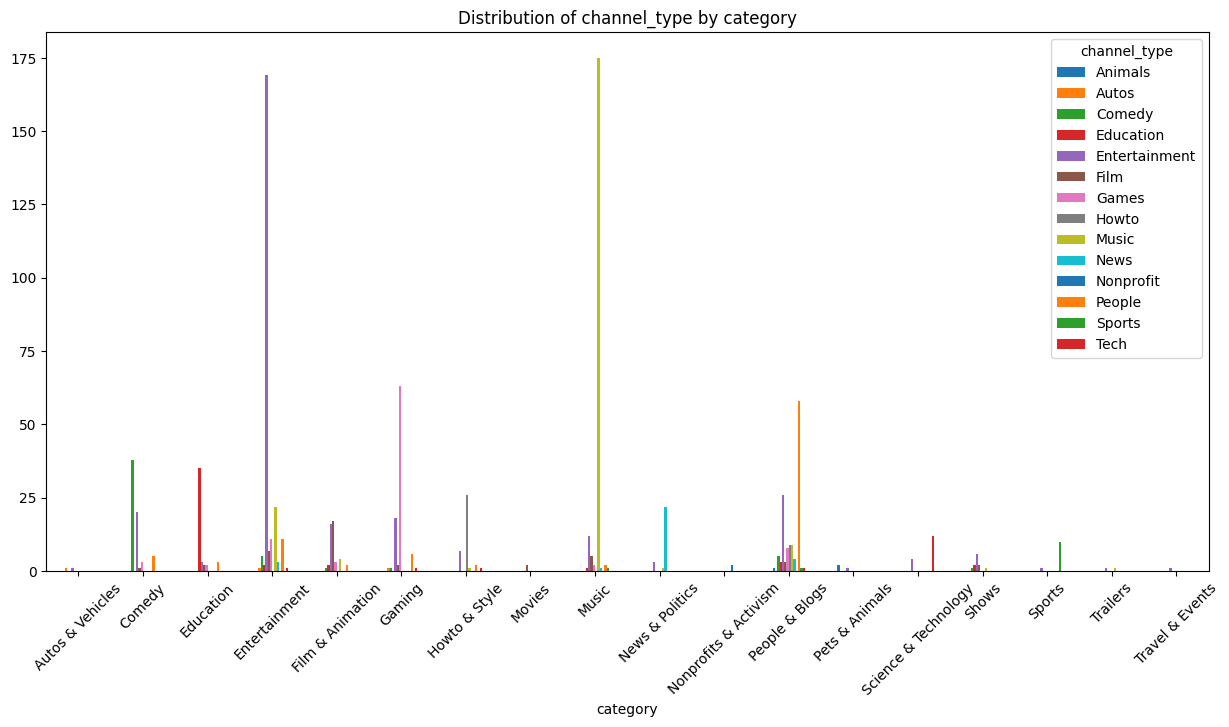

In [7]:
pre_viz.plot_channel_category_counts('category', 'channel_type')

# Pre Processing

In [8]:
processor = DataPreprocessor(data=data)

In [9]:
data.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [10]:
data = processor.preprocess()

In [11]:
data.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                     int64
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                 int64
channel_type                                 int64
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

# Feature-Engineering

In [12]:
engineer = FeatureEngineer(data, 'avg_yearly_earnings')
engineered_data = engineer.engineer_features()

# Visualization (Post-processing)

In [13]:
post_viz = PostprocessVisualizer(engineered_data)

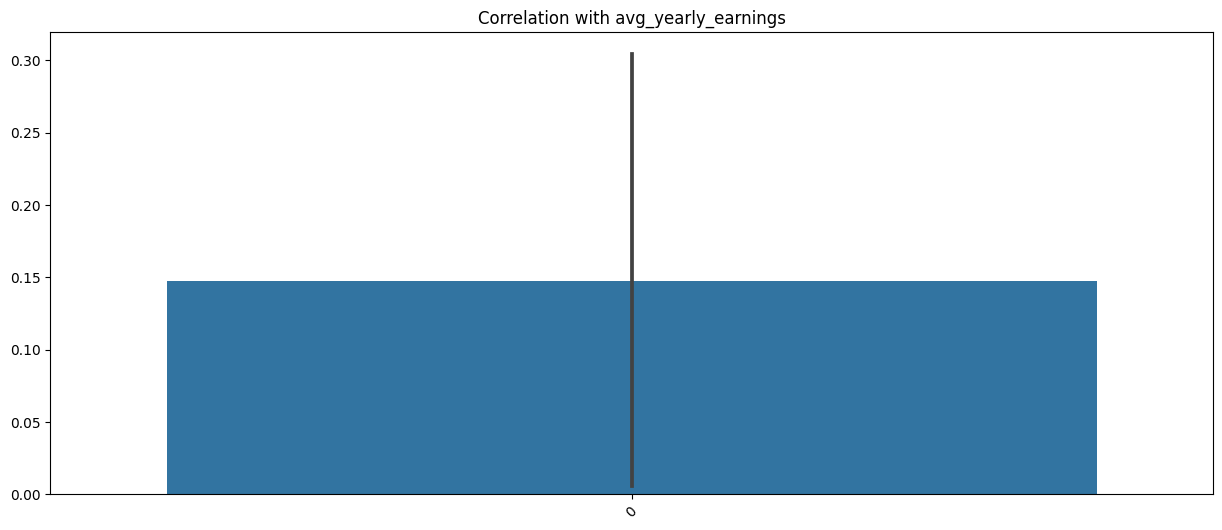

In [14]:
post_viz.plot_correlation_analysis(target='avg_yearly_earnings')

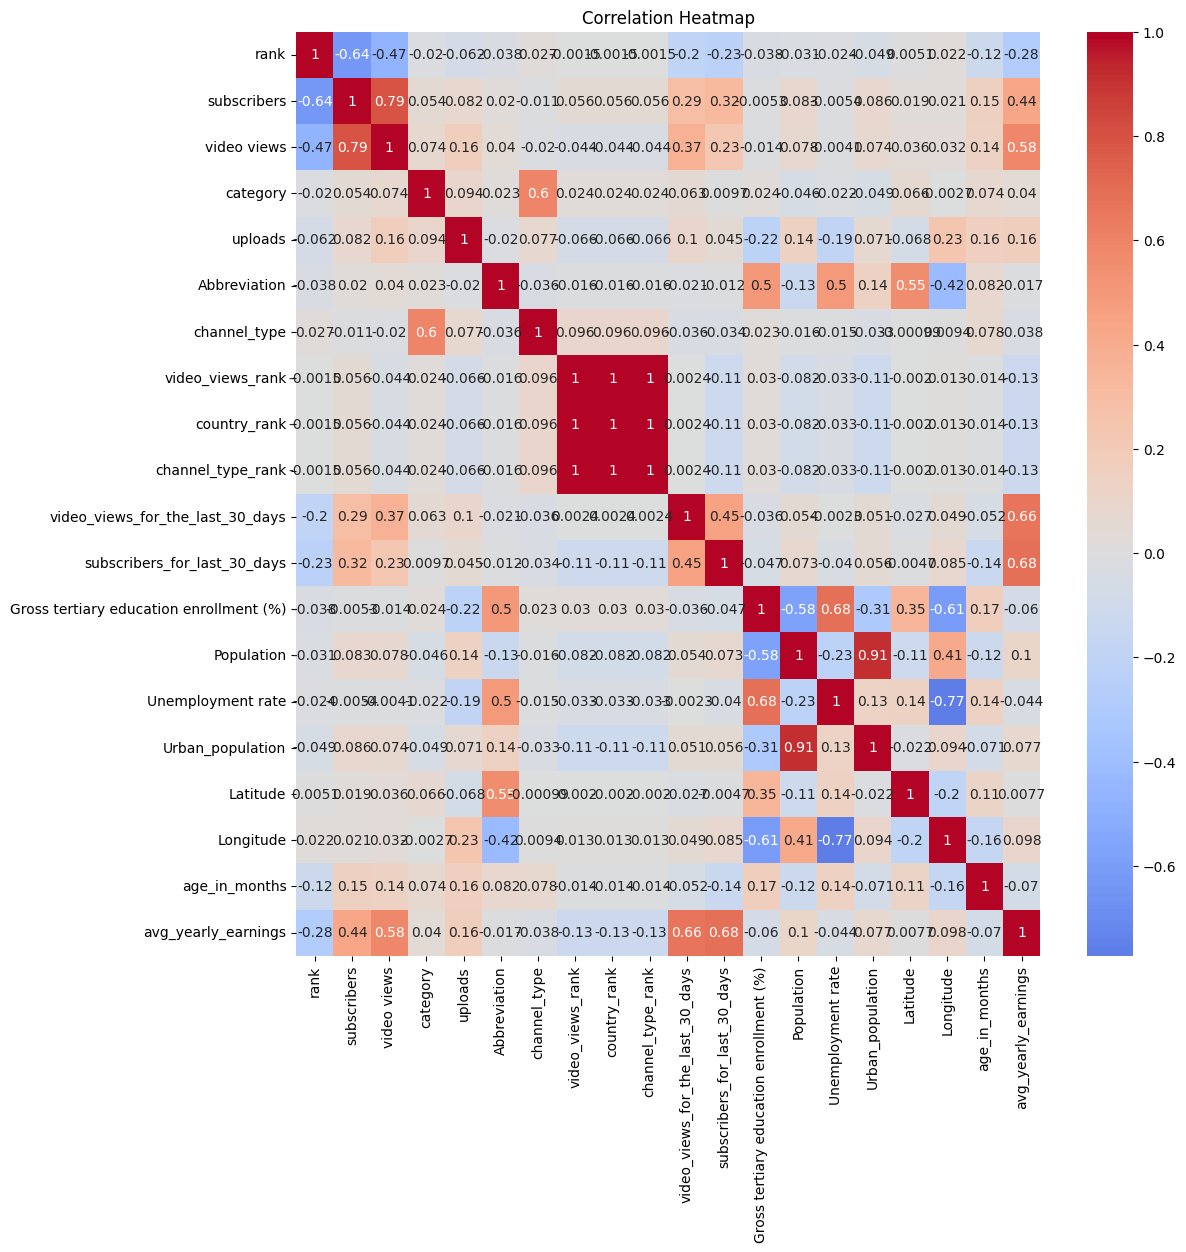

In [15]:
post_viz.plot_heatmap()

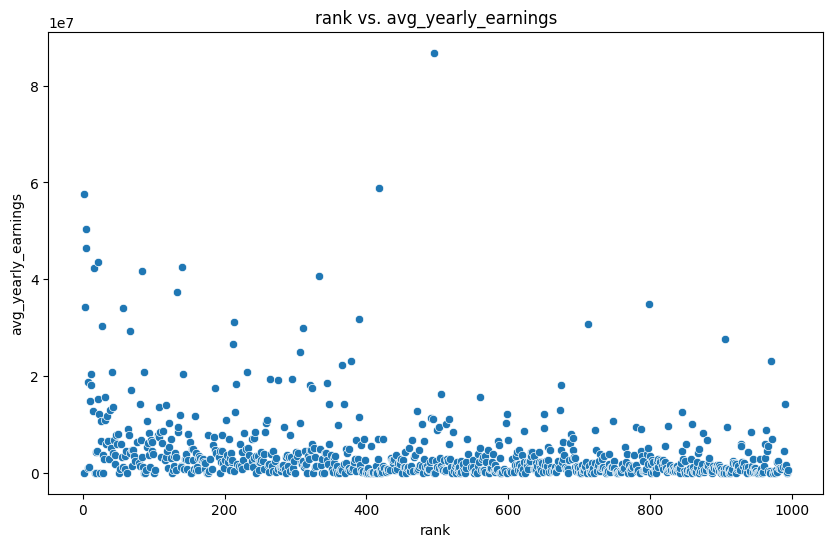

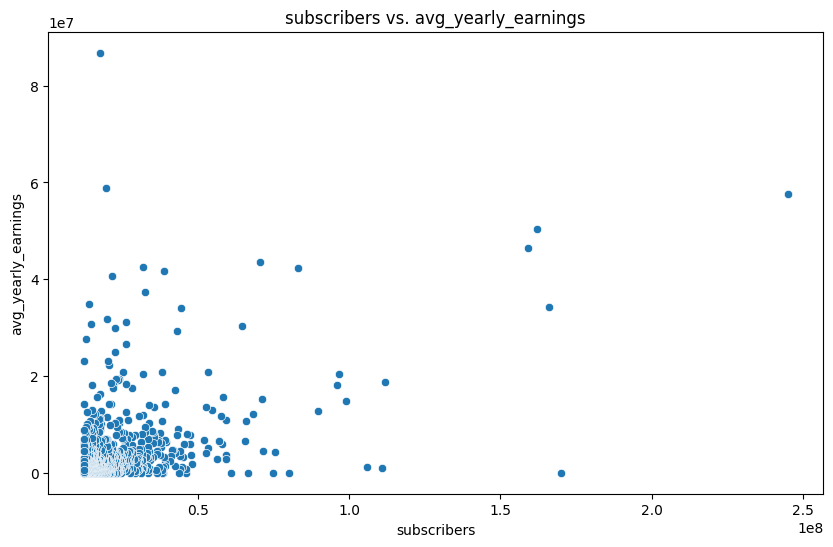

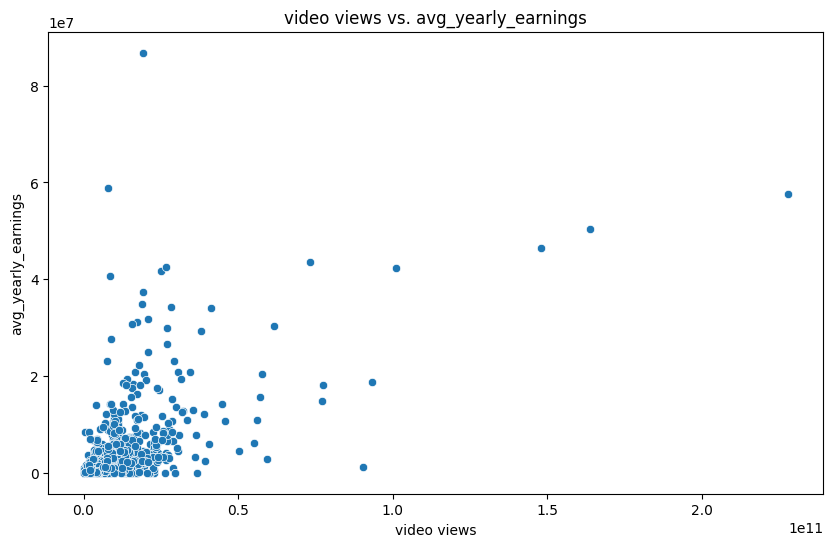

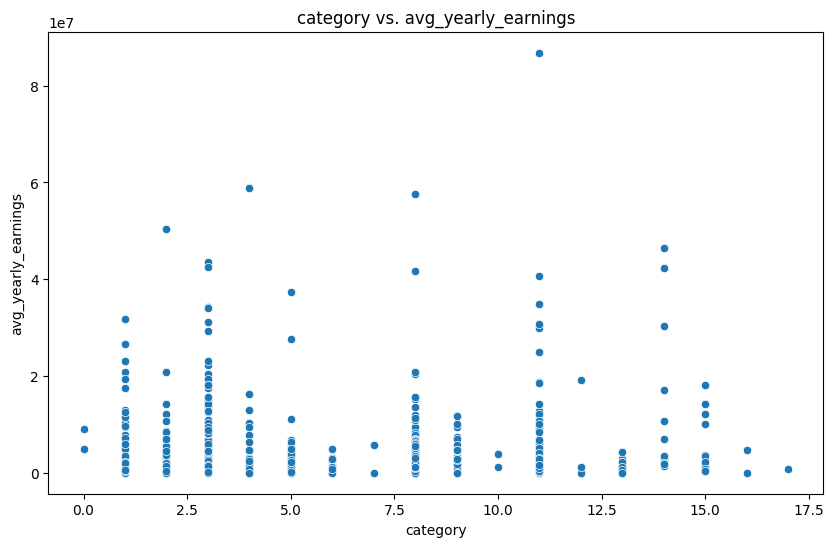

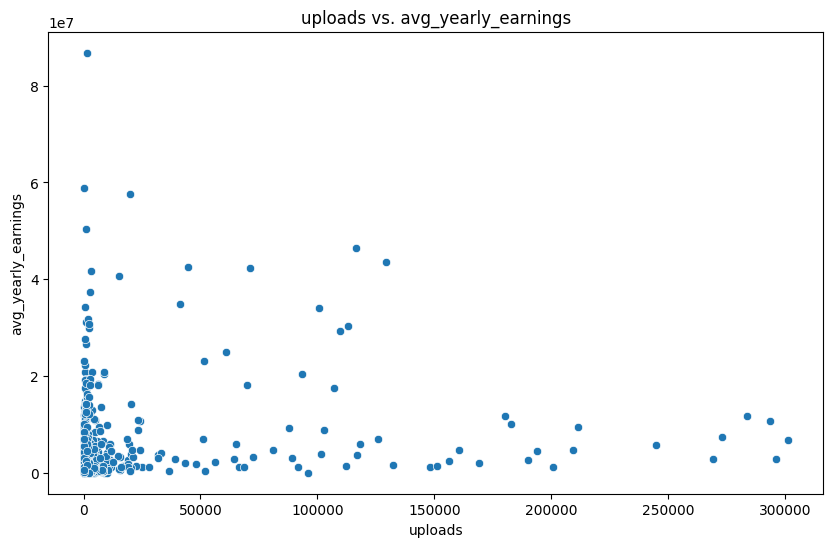

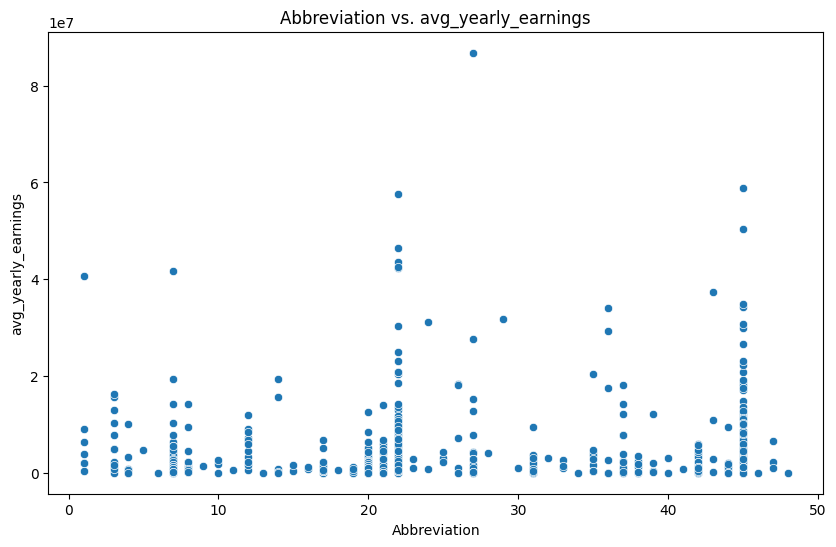

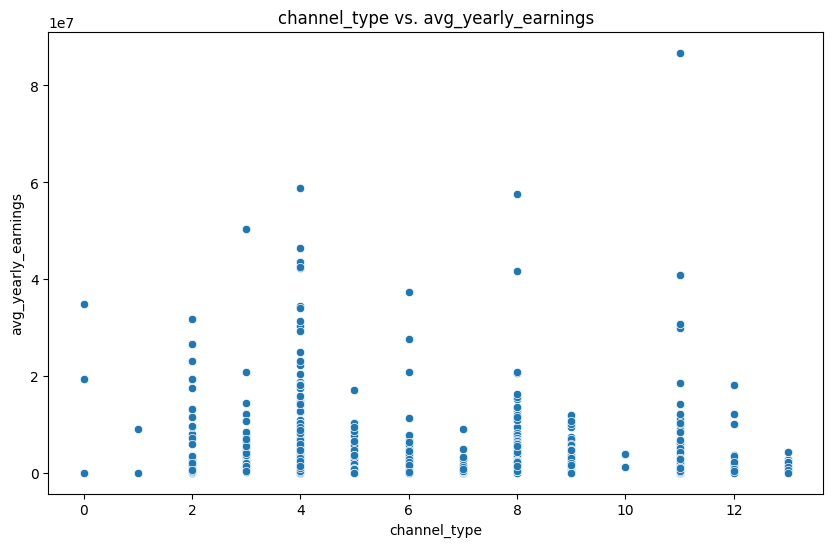

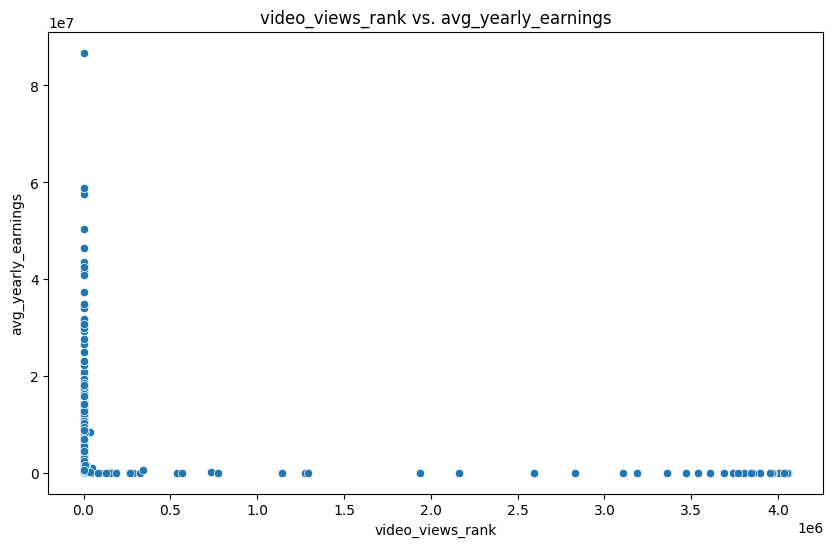

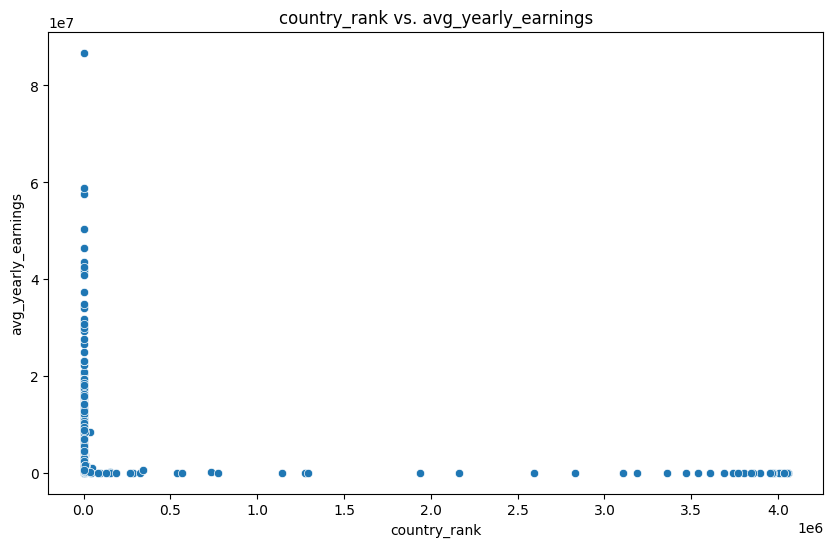

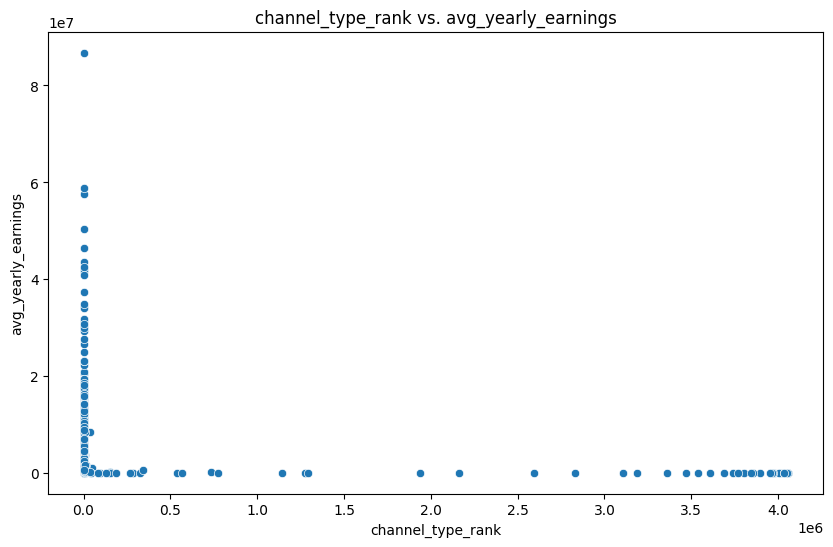

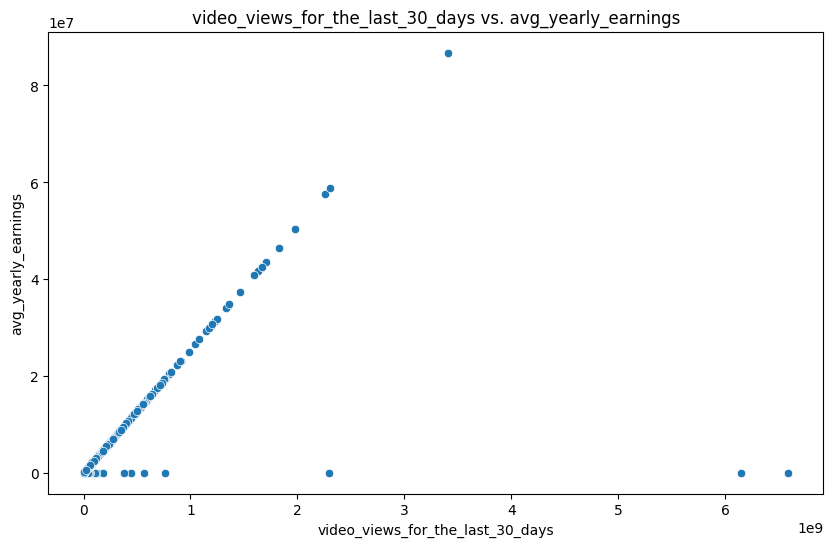

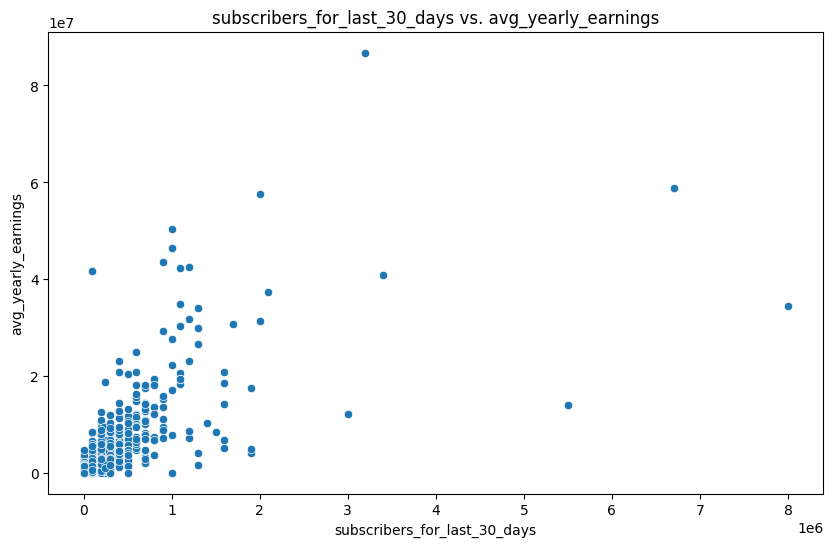

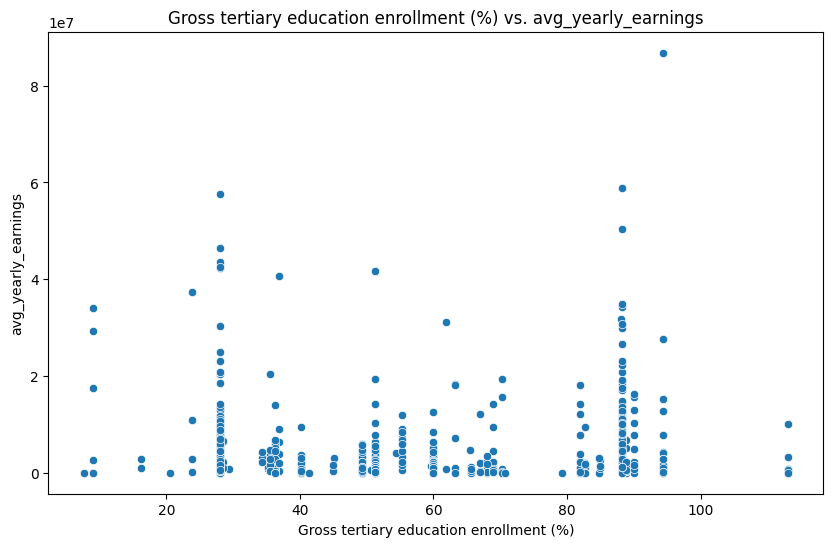

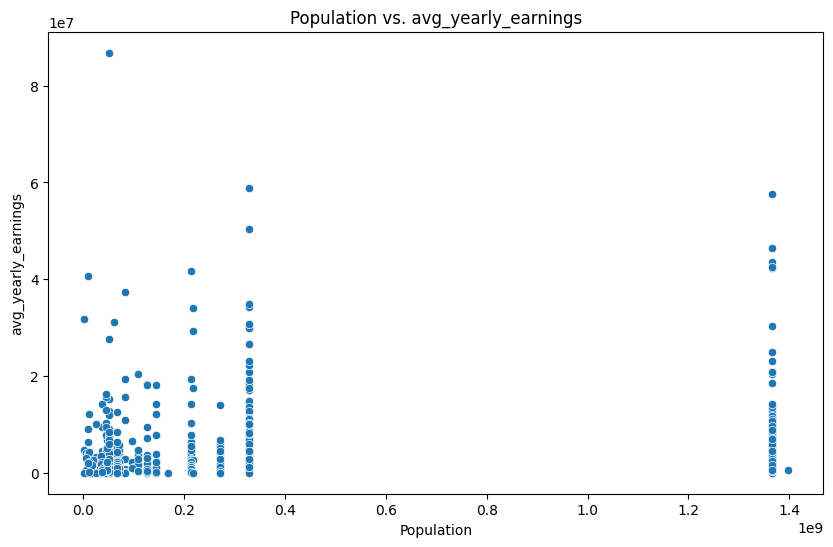

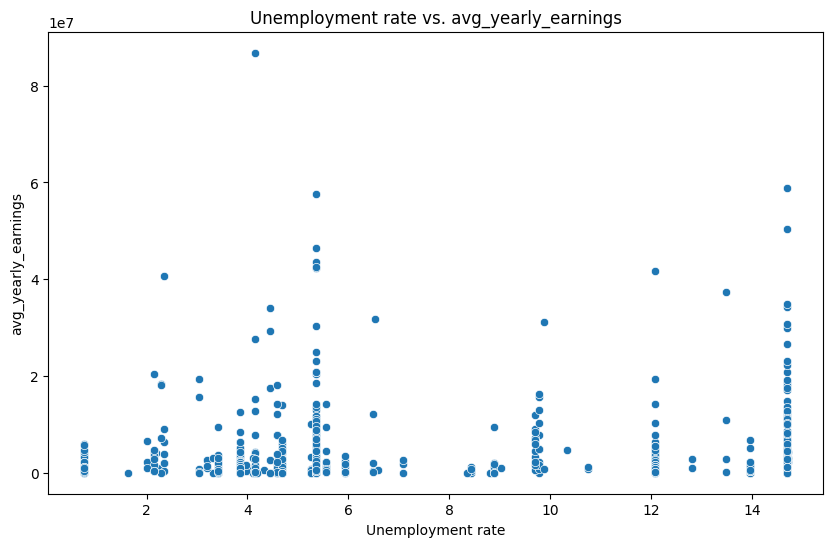

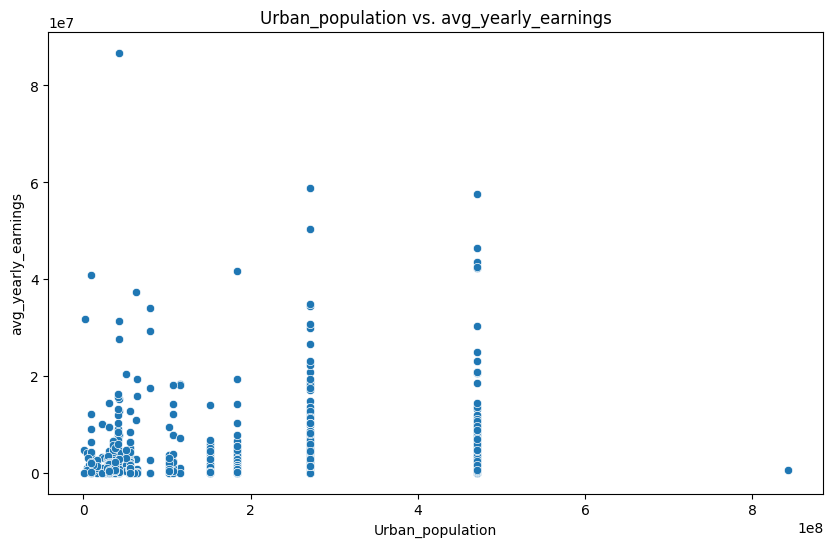

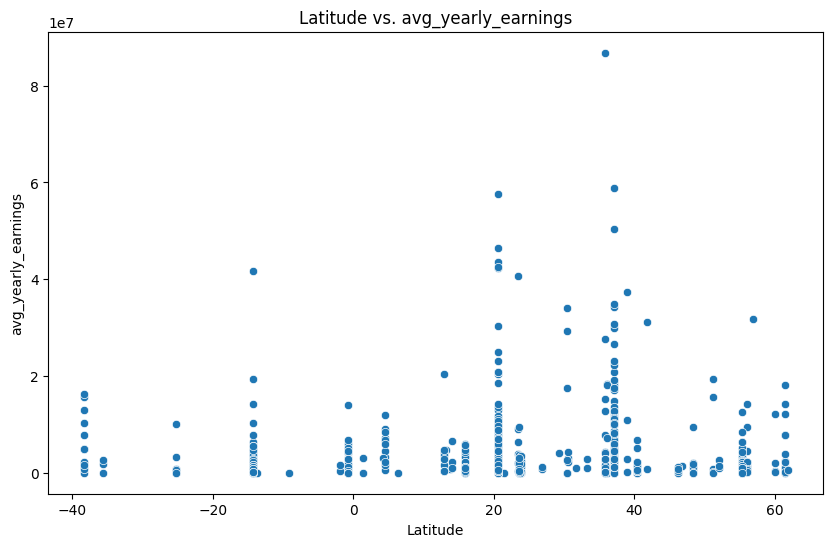

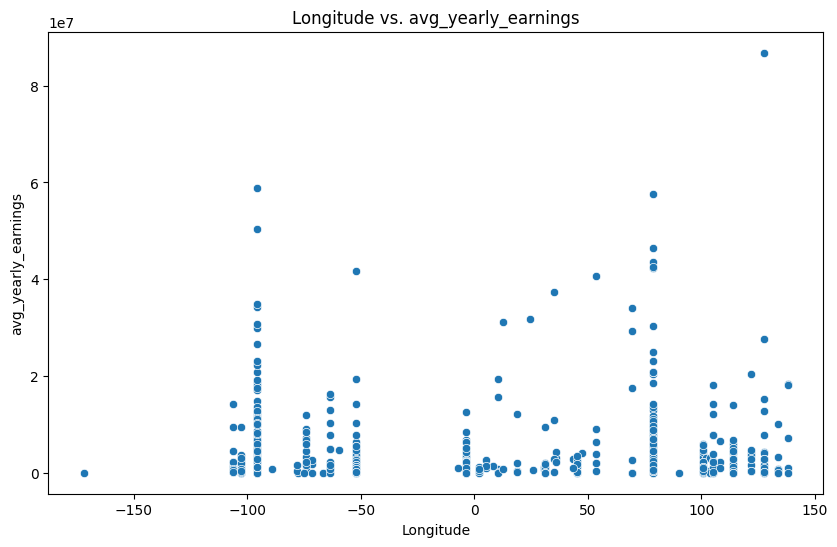

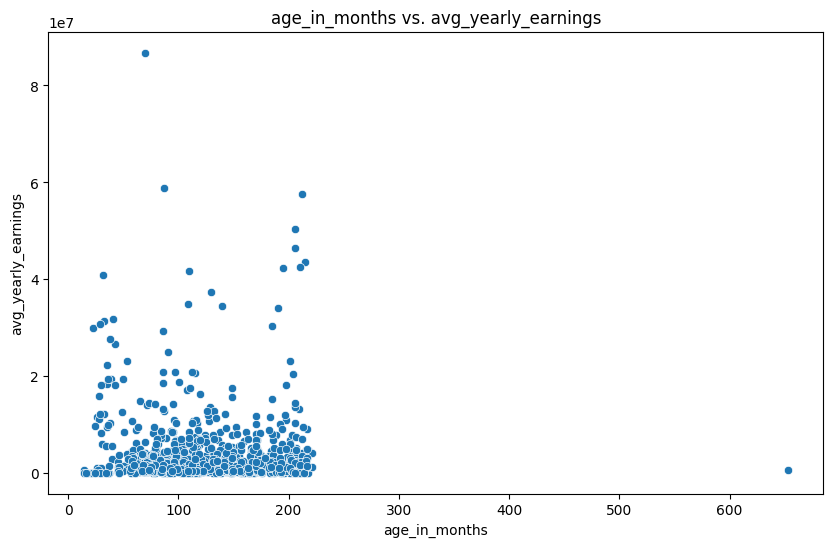

In [16]:
post_viz.plot_scatterplots(target='avg_yearly_earnings')

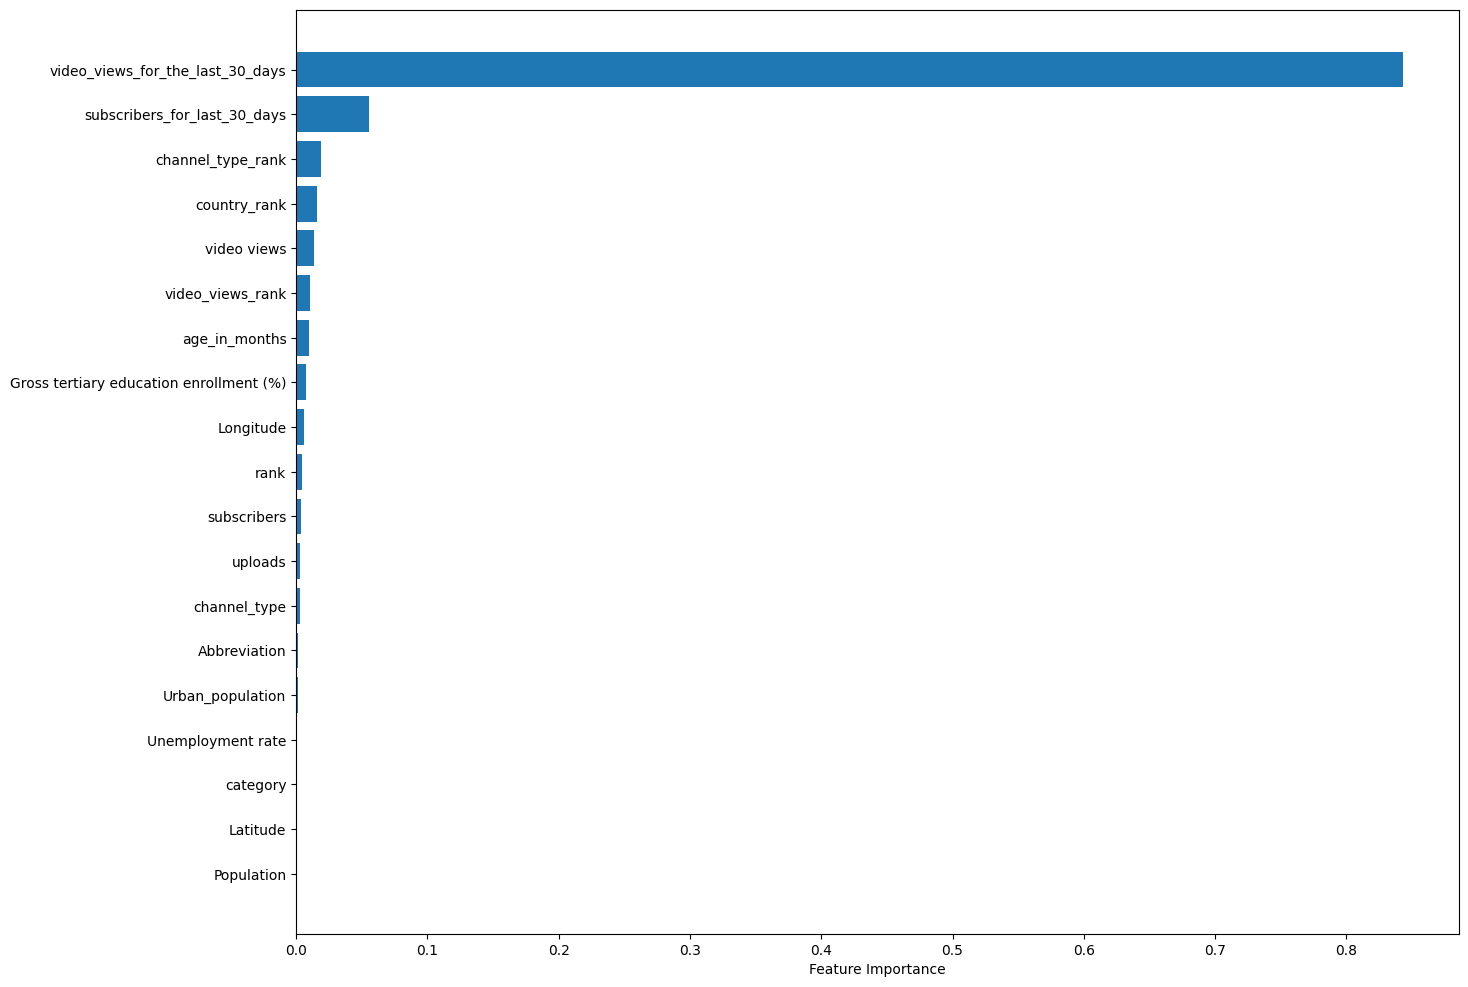

In [17]:
post_viz.plot_feature_importance(target='avg_yearly_earnings')

# Model

In [18]:
model_instance = Model(engineered_data, 'avg_yearly_earnings')
model_instance.train()
mse, r2 = model_instance.evaluate()
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2419266605141.736
R^2 Score: 0.9391637693595423
